In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the dataset
file_path = "/content/merged_restaurants_census.csv"
df = pd.read_csv(file_path)
print("Dataset being used: \n",df.head())

Dataset being used: 
                           Title              Category  Rating  \
0     Dairy Queen Grill & Chill  Fast food restaurant     3.8   
1             Jake's Restaurant   American restaurant     4.4   
2                 Carib Kitchen  Caribbean restaurant     4.9   
3  Cazadores Mexican Restaurant    Mexican restaurant     4.5   
4       La Posada Mexican Grill    Mexican restaurant     4.3   

                                             Address  \
0  Dairy Queen Grill & Chill, 3143 US-280, Alexan...   
1  Jake's Restaurant, 16 Broad St, Alexander City...   
2  Carib Kitchen, 68 Broad St, Alexander City, AL...   
3  Cazadores Mexican Restaurant, 910 Cherokee Rd,...   
4  La Posada Mexican Grill, 3714 US-280, Alexande...   

                                          Categories   ZCTA         NAME  \
0         ['Fast food restaurant', 'Ice cream shop']  35010  ZCTA5 35010   
1                            ['American restaurant']  35010  ZCTA5 35010   
2                     

In [18]:
# Step 2: Select numerical features
numerical_features = [
    "Rating", "ZCTA", "Median_Income", "Population",
    "Males_20yrs_age", "Males_30yrs_age", "Males_60yrs_age",
    "Females_20yrs_age", "Females_30yrs_age", "Females_60yrs_age",
    "Asian", "American", "Hispanic_or_Latino"
]

df_numerical = df[numerical_features]

# Step 3: Feature Selection using Filter Method (Correlation)
correlation_matrix = df_numerical.corr().abs()
print("The correlation matrix is: \n",correlation_matrix)

The correlation matrix is: 
                       Rating      ZCTA  Median_Income  Population  \
Rating              1.000000  0.013891       0.035863    0.034834   
ZCTA                0.013891  1.000000       0.016117    0.122605   
Median_Income       0.035863  0.016117       1.000000    0.090206   
Population          0.034834  0.122605       0.090206    1.000000   
Males_20yrs_age     0.025563  0.068010       0.107784    0.552797   
Males_30yrs_age     0.004772  0.155435       0.025632    0.816998   
Males_60yrs_age     0.024138  0.065549       0.106436    0.767481   
Females_20yrs_age   0.013033  0.055993       0.111063    0.472236   
Females_30yrs_age   0.002124  0.111525       0.033064    0.824704   
Females_60yrs_age   0.027761  0.051265       0.088551    0.781786   
Asian               0.007585  0.159765       0.323343    0.410561   
American            0.031018  0.054165       0.122630    0.370996   
Hispanic_or_Latino  0.008438  0.226002       0.043312    0.594087   

    

In [19]:
# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.85 (high correlation threshold)
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
#Print the Features that were dropped
print("Features that were dropped after performing correlation filter method: \n",to_drop)

Features that were dropped after performing correlation filter method: 
 ['Females_20yrs_age', 'Females_30yrs_age']


In [20]:
# Drop highly correlated features
df_filtered = df_numerical.drop(columns=to_drop)
print("Cleaned and Prepared Data: \n",df_filtered.head())
df_filtered.to_csv("clean_data.csv", index=False)

Cleaned and Prepared Data: 
    Rating   ZCTA  Median_Income  Population  Males_20yrs_age  Males_30yrs_age  \
0     3.8  35010        46730.0     20406.0            414.0            658.0   
1     4.4  35010        46730.0     20406.0            414.0            658.0   
2     4.9  35010        46730.0     20406.0            414.0            658.0   
3     4.5  35010        46730.0     20406.0            414.0            658.0   
4     4.3  35010        46730.0     20406.0            414.0            658.0   

   Males_60yrs_age  Females_60yrs_age  Asian  American  Hispanic_or_Latino  
0            409.0              434.0  107.0    1864.0               899.0  
1            409.0              434.0  107.0    1864.0               899.0  
2            409.0              434.0  107.0    1864.0               899.0  
3            409.0              434.0  107.0    1864.0               899.0  
4            409.0              434.0  107.0    1864.0               899.0  


In [21]:
# Step 4: Normalize Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)
df_scaled = pd.DataFrame(df_scaled, columns=df_filtered.columns)
print("Scaled Data: \n",df_scaled.head())

Scaled Data: 
      Rating      ZCTA  Median_Income  Population  Males_20yrs_age  \
0 -1.145095 -0.525217      -0.944978   -0.638614        -0.125441   
1  0.314599 -0.525217      -0.944978   -0.638614        -0.125441   
2  1.531011 -0.525217      -0.944978   -0.638614        -0.125441   
3  0.557882 -0.525217      -0.944978   -0.638614        -0.125441   
4  0.071317 -0.525217      -0.944978   -0.638614        -0.125441   

   Males_30yrs_age  Males_60yrs_age  Females_60yrs_age     Asian  American  \
0        -0.657165        -0.118655          -0.214117 -0.471094  0.452997   
1        -0.657165        -0.118655          -0.214117 -0.471094  0.452997   
2        -0.657165        -0.118655          -0.214117 -0.471094  0.452997   
3        -0.657165        -0.118655          -0.214117 -0.471094  0.452997   
4        -0.657165        -0.118655          -0.214117 -0.471094  0.452997   

   Hispanic_or_Latino  
0           -0.545226  
1           -0.545226  
2           -0.545226  
3    

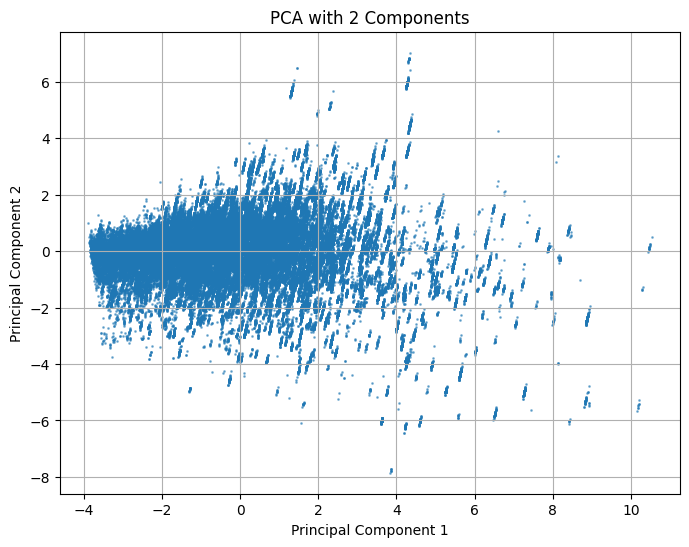

Percentage of information remained in the 2D dataset: 
 49.808798942771695 %


In [22]:
# Step 5: Perform PCA with 2 and 3 components
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_scaled)

pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_scaled)

# Variance explained by PCA models
explained_variance_2d = np.sum(pca_2d.explained_variance_ratio_) * 100
explained_variance_3d = np.sum(pca_3d.explained_variance_ratio_) * 100

# Step 6: Visualize the PCA results (2D)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], alpha=0.5, s=1)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA with 2 Components")
plt.grid(True)
plt.show()

print("Percentage of information remained in the 2D dataset: \n",explained_variance_2d,"%")

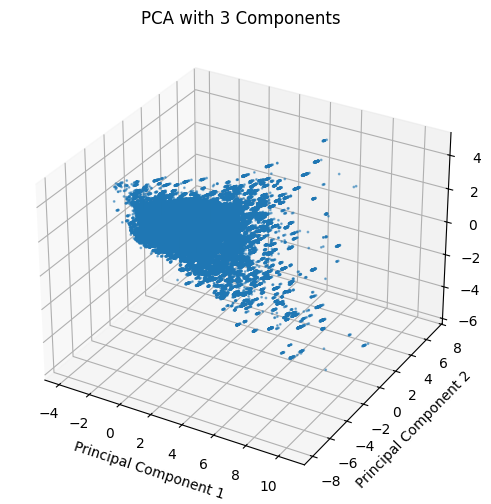

Percentage of information remained in the 3D dataset: 
 61.29643326130727 %




In [23]:
# Step 7: Visualize the PCA results (3D)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_3d[:, 0], df_pca_3d[:, 1], df_pca_3d[:, 2], alpha=0.5, s=1)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("PCA with 3 Components")
plt.show()

print("Percentage of information remained in the 3D dataset: \n",explained_variance_3d,"%")
print("\n")

Cumulative Percentage Results (%): 
 [ 37.07203373  49.80879894  61.29643326  70.35314062  78.49939698
  84.95049102  90.2885939   94.7477748   98.1029598   99.48922659
 100.        ] 



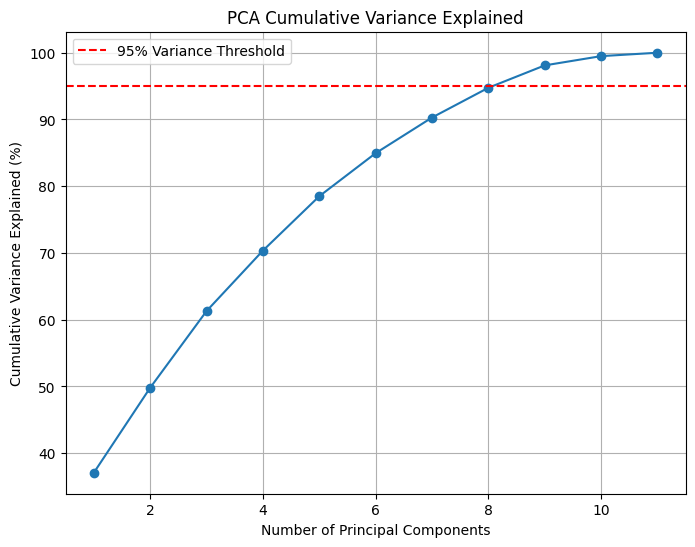



No. of Dimensions required in dataset (after using PCA) to retain at least 95% of the data: 
 9


Top Three Eigenvalues: 
 [4.07795375 1.4010545  1.26364908]


In [24]:
# Step 8: Find the number of components to retain 95% variance
pca_full = PCA()
df_pca_full = pca_full.fit_transform(df_scaled)

# Compute cumulative variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
cumulative_variance_ = np.cumsum(pca_full.explained_variance_ratio_)*100
print("Cumulative Percentage Results (%): \n",cumulative_variance_,"\n")

# Find the number of components needed for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Step 9: Extract top three eigenvalues
top_three_eigenvalues = pca_full.explained_variance_[:3]

# Step 10: Plot cumulative variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, marker='o')
plt.axhline(y=95, color='r', linestyle='--', label="95% Variance Threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained (%)")
plt.title("PCA Cumulative Variance Explained")
plt.legend()
plt.grid(True)
plt.show()
print('\n')

print("No. of Dimensions required in dataset (after using PCA) to retain at least 95% of the data: \n",n_components_95)
print("\n")
print("Top Three Eigenvalues: \n",top_three_eigenvalues)